In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Importing all the necessary models

In [49]:
df=pd.read_csv('/content/insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Using read_csv print the dataset from the excel sheet

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Describes the information about the number of columns and its type

In [51]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


It calculates the statastics of the numerical variable.

In [52]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


Check if there are any duplicate value in the table

In [53]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Tells if there are can null values in the dataset or not

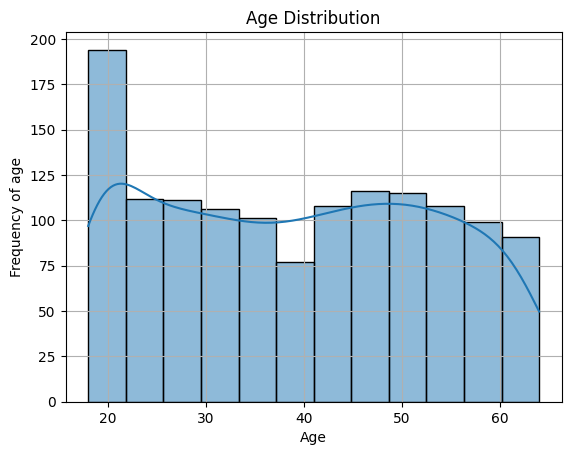

In [54]:
# Distribution of age value
sns.histplot(data=df,x='age',kde=True)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency of age")
plt.grid()

Text(0, 0.5, 'Frequency of gender')

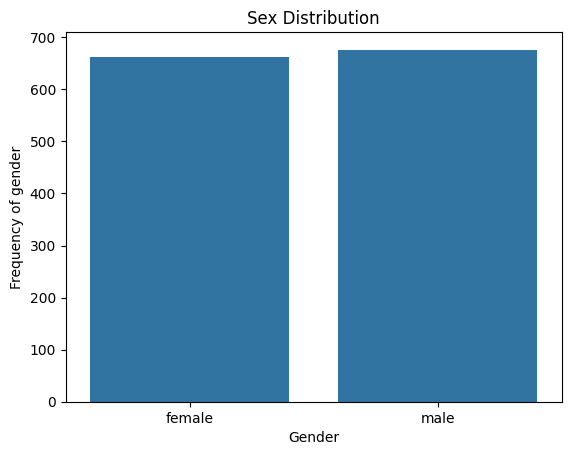

In [55]:
# Gender column
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.xlabel("Gender")
plt.ylabel("Frequency of gender")


In [56]:
print(df['sex'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64


The gender male who have insurance are 676
And Female are 662

<ipython-input-57-95e8d47fbcc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


Text(0, 0.5, 'Normal Distribution')

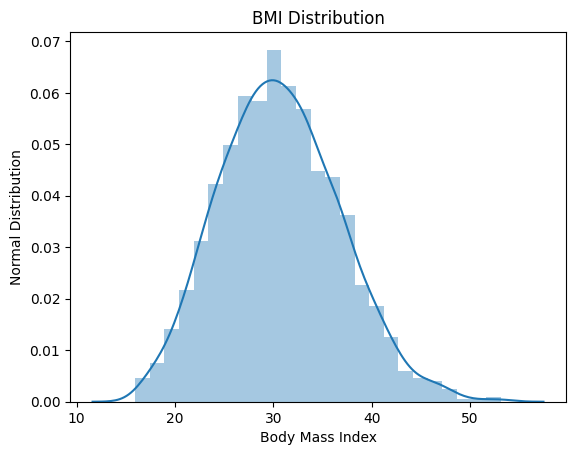

In [57]:
# bmi distribution
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.xlabel("Body Mass Index")
plt.ylabel("Normal Distribution")

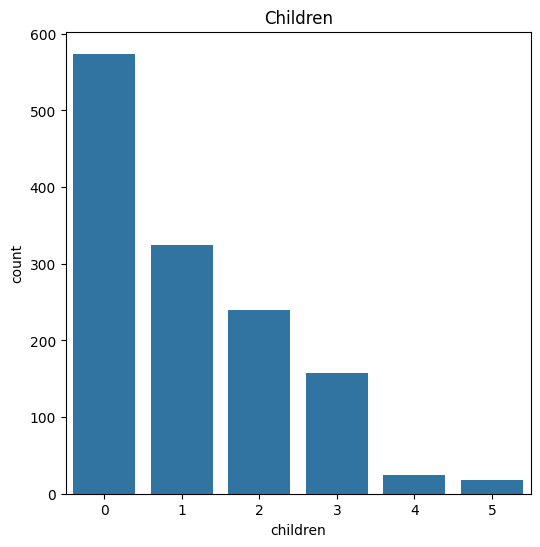

In [58]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [59]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


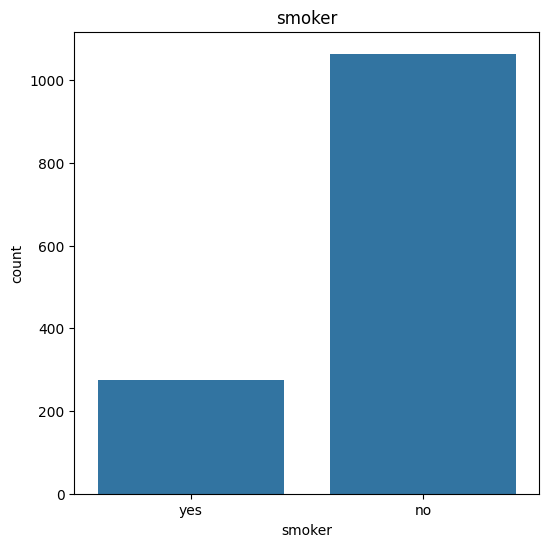

In [60]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [61]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


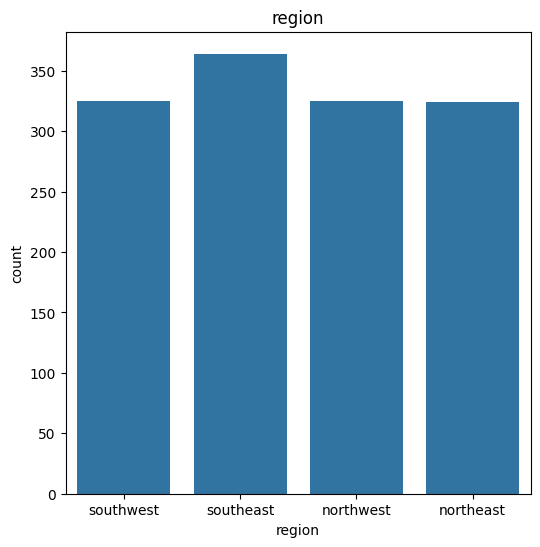

In [62]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [63]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-64-15610678a056>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


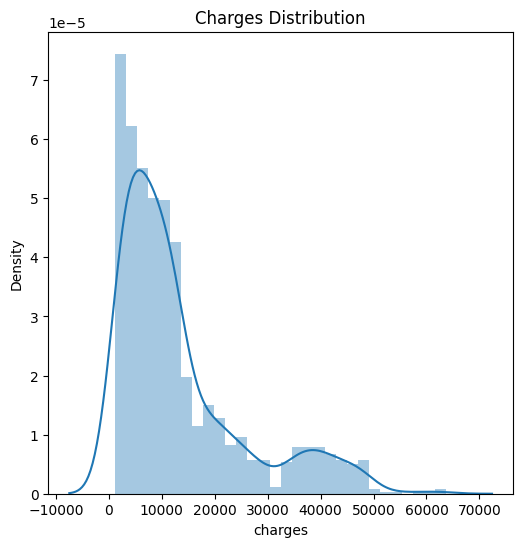

In [64]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [65]:
numerical_feature=['age','bmi','children']
categorical_feature=['sex','smoker','region']

numeric_transformer=SimpleImputer()
categorical_transformer = OneHotEncoder()

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numerical_feature),
        ('cat',categorical_transformer,categorical_feature)
    ]
)

In [70]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [66]:
X=df.drop('charges',axis=1)
y=df['charges']
print(X)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]


In [67]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [72]:
y_pred=model.predict(X_test)

In [74]:
r2_score=r2_score(y_test,y_pred)
print(f"R2 Score : {r2_score}")

R2 Score : 0.7835929767120722


In [77]:
input_data = (31, 'male', 25.74, 0, 'yes', 'southeast')  # use original string values if your model used OneHotEncoder

# Create DataFrame with correct column names in the same order
input_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Predict
prediction = model.predict(input_df)
print("Predicted insurance cost: USD", prediction[0])

Predicted insurance cost: USD 27686.462985157523
